In [2]:

import pandas as pd

from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


dfdatos2024input=pd.read_excel(r"C:\Users\Franscisco Giacobell\Desktop\Visual Notebook\Ciencia de datos\TP3\CC408-T2-5\usu_individual_T124.xlsx")
dfdatos2004input=pd.read_stata(r"C:\Users\Franscisco Giacobell\Desktop\Visual Notebook\Ciencia de datos\TP3\CC408-T2-5\Individual_t104.dta")



In [3]:
dfdatos2024=dfdatos2024input
dfdatos2004=dfdatos2004input

Eliminen todas las observaciones que no corresponden a los
aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos
Aires, y unan ambos trimestres en una sola base.


In [4]:
#Se eliminan los valores que no son de buenos aires o de gran buenos aires
dfdatos2004 = dfdatos2004[
    (dfdatos2004['aglomerado'] == 'Ciudad de Buenos Aires') |
    (dfdatos2004['aglomerado'] == 'Partidos del GBA')
]
dfdatos2024 = dfdatos2024[
    (dfdatos2024['AGLOMERADO'] == 33) |
    (dfdatos2024['AGLOMERADO'] == 32)
]

print(dfdatos2004['aglomerado'].value_counts())
print(dfdatos2024['AGLOMERADO'].value_counts())



aglomerado
Partidos del GBA                   5811
Ciudad de Buenos Aires             1836
Gran La Plata                         0
Jujuy - Palpalá                       0
Mar del Plata - Batán                 0
Ushuaia - Río Grande                  0
Santa Rosa - Toay                     0
Gran Tucumán - Tafí Viejo             0
Gran San Juan                         0
San Luis - El Chorrillo               0
La Rioja                              0
Salta                                 0
Gran Catamarca                        0
Río Gallegos                          0
Santiago del Estero - La Banda        0
Bahía Blanca - Cerri                  0
Neuquén - Plottier                    0
Formosa                               0
Concordia                             0
Gran Córdoba                          0
Corrientes                            0
Gran Mendoza                          0
Comodoro Rivadavia - Rada Tilly       0
Gran Resistencia                      0
Posadas                      

Si hay observaciones con valores que no tienen sentido,
descártenlas (por ejemplo, ingresos y edades negativos). Expliquen
las decisiones tomadas.


In [5]:
#se seleccionan las columnas que se utilizarán para el resto del analisis
dfdatos2004=dfdatos2004[['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac', 'ipcf']]
dfdatos2024=dfdatos2024[['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC', 'IPCF']]
print(dfdatos2004.columns)
print(dfdatos2024.columns)


Index(['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac',
       'ipcf'],
      dtype='object')
Index(['CH04', 'CH06', 'CH07', 'CH08', 'NIVEL_ED', 'ESTADO', 'CAT_INAC',
       'IPCF'],
      dtype='object')


In [6]:
#se chequea si hay nulls en las variables de 2004
print(dfdatos2004.isnull().sum())




ch04        0
ch06        0
ch07        0
ch08        0
nivel_ed    0
estado      0
cat_inac    0
ipcf        0
dtype: int64


In [7]:
# se chequea si en icpf hay negativos
print((dfdatos2004['ipcf']<0).sum())
print((dfdatos2024['IPCF']<0).sum())

0
0


In [8]:
#se chequea si hay nulls en las variables de 2024
print(dfdatos2024.isnull().sum())

CH04        0
CH06        0
CH07        0
CH08        0
NIVEL_ED    0
ESTADO      0
CAT_INAC    0
IPCF        0
dtype: int64


In [9]:
#se convierte a numerico los valores de ch06 (edades) de los datos de 2004, convirtiendo en na los valores que no son numeros
dfdatos2004['ch06'] = pd.to_numeric(dfdatos2004['ch06'], errors='coerce')
#transformacion de ipcf de 2004 para estar de acuerdo con la inflacion de 2024
dfdatos2004['ipcf']=dfdatos2004['ipcf']*633.97


In [10]:
#chequeo de nas y posterior eliminacion
print(dfdatos2004.isnull().sum())
dfdatos2004=dfdatos2004.dropna()
print(dfdatos2004['estado'].value_counts())
print(dfdatos2024['ESTADO'].value_counts())

ch04          0
ch06        135
ch07          0
ch08          0
nivel_ed      0
estado        0
cat_inac      0
ipcf          0
dtype: int64
estado
Ocupado                                                         3078
Inactivo                                                        2797
Menor de 10 años                                                1099
Desocupado                                                       528
Entrevista individual no realizada (no respuesta al cuestion      10
Name: count, dtype: int64
ESTADO
1    3224
3    2662
4     813
2     311
0      41
Name: count, dtype: int64


In [11]:
#se chequea si hay valores negativos en edad (ch06)
print((dfdatos2004['ch06']<0).sum())
print((dfdatos2024['CH06']<0).sum())

0
51


In [12]:
#se eliminan valores que sean menores a 0 debido a que se esta definiendo edades y ingresos
dfdatos2024 = dfdatos2024[dfdatos2024['CH06'] > 0]
dfdatos2004 = dfdatos2004[dfdatos2004['ch06'] > 0]



In [13]:
#chequeo de las variables a ver si tienen nas
print(dfdatos2024.isnull().sum())
print(dfdatos2004.isnull().sum())

CH04        0
CH06        0
CH07        0
CH08        0
NIVEL_ED    0
ESTADO      0
CAT_INAC    0
IPCF        0
dtype: int64
ch04        0
ch06        0
ch07        0
ch08        0
nivel_ed    0
estado      0
cat_inac    0
ipcf        0
dtype: int64


In [14]:
print(dfdatos2004['cat_inac'].value_counts())

#cat_inac define a que categoría de inactividad pertenece el sujeto si está inactivo, los 0.0 representan a aquellos que no deben responder a esta pregunta

cat_inac
0.0                    3616
Estudiante             1594
Ama de casa             816
Jubilado/pensionado     665
Menor de 6 años         632
Otros                   134
Discapacitado            41
Rentista                 14
Name: count, dtype: int64


In [15]:
#conversion de las variables de 2004 al formato numerico de 2024, para facilitar posteriormente el analisis
#ch04=genero
#ch07= estado civil
#ch08= estado de salud
#nivel_ed= nivel educativo
#estado = estado laboral
#cat_inac= categoría de inactividad
dfdatos2004['ch04'] = dfdatos2004['ch04'].replace({'Varón': 1, 'Mujer': 2})

dfdatos2004['ch07'] = dfdatos2004['ch07'].replace({'Unido': 1, 'Casado': 2,'Separado o divorciado':3, 'Viudo':4,'Ns./Nr.':0,'Soltero':5})

mapeosalud = {'Obra social (incluye PAMI)': 1,'No paga ni le descuentan': 2,'Mutual/Prepaga/Servicio de emergencia': 3,'Obra social y mutual/prepaga/servicio de emergencia': 12,'Planes y seguros públicos': 3,'Ns./Nr.': 9,  'Obra social, mutual/prepaga/servicio de emergencia y planes': 123,'Obra social y planes y seguros públicos': 13,'Mutual/prepaga/servicio de emergencia/planes y seguros públi': 23}

dfdatos2004['ch08'] = dfdatos2004['ch08'].map(mapeosalud)

dfdatos2004['ch08'] = pd.to_numeric(dfdatos2004['ch08'], errors='coerce')


mapeonivel = {'Primaria Incompleta (incluye educación especial)': 1,'Primaria Completa': 2,'Secundaria Incompleta': 3,'Secundaria Completa': 4,'Superior Universitaria Incompleta': 5,'Superior Universitaria Completa': 6,'Sin instrucción': 7,'Ns./ Nr.': 9  }

dfdatos2004['nivel_ed'] = dfdatos2004['nivel_ed'].map(mapeonivel)

dfdatos2004['nivel_ed'] = pd.to_numeric(dfdatos2004['nivel_ed'], errors='coerce')

mapeoestado = {'Entrevista individual no realizada (no respuesta al cuestion': 0,'Ocupado': 1,'Desocupado': 2,'Inactivo': 3,'Menor de 10 años': 4}

dfdatos2004['estado'] = dfdatos2004['estado'].map(mapeoestado)

dfdatos2004['estado'] = pd.to_numeric(dfdatos2004['estado'], errors='coerce')

maepoinac = {'Jubilado / Pensionado': 1,'Rentista': 2,'Estudiante': 3,'Ama de casa': 4,'Menor de 6 años': 5,'Discapacitado': 6,'Otros': 7,0.0:0}

dfdatos2004['cat_inac'] = dfdatos2004['cat_inac'].map(maepoinac)



C:\Users\Franscisco Giacobell\AppData\Local\Temp\ipykernel_17168\2620041040.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfdatos2004['ch04'] = dfdatos2004['ch04'].replace({'Varón': 1, 'Mujer': 2})
C:\Users\Franscisco Giacobell\AppData\Local\Temp\ipykernel_17168\2620041040.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  dfdatos2004['ch04'] = dfdatos2004['ch04'].replace({'Varón': 1, 'Mujer': 2})
C:\Users\Franscisco Giacobell\AppData\Local\Temp\ipykernel_17168\2620041040.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated

In [16]:
print(dfdatos2004.isnull().sum())
dfdatos2004['estado']=dfdatos2004['estado'].dropna()
print(dfdatos2004.columns)

ch04          0
ch06          0
ch07          0
ch08          0
nivel_ed      0
estado        0
cat_inac    665
ipcf          0
dtype: int64
Index(['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac',
       'ipcf'],
      dtype='object')


In [17]:
#se le agrega a los datos las variables ano para categorizar de que año provienen para posteriormente facilitar el analisis
dfdatos2004['ano'] = 2004
dfdatos2024['ano'] = 2024

In [18]:
print(dfdatos2004.isna().sum())

ch04          0
ch06          0
ch07          0
ch08          0
nivel_ed      0
estado        0
cat_inac    665
ipcf          0
ano           0
dtype: int64


In [19]:
dfdatos2024.columns=dfdatos2024.columns.str.lower()


In [20]:
print(dfdatos2024)

       ch04  ch06  ch07  ch08  nivel_ed  estado  cat_inac      ipcf   ano
245       2    85     4     1         2       1         0       0.0  2024
246       1    59     2     1         6       1         0       0.0  2024
247       2    57     2     1         6       1         0       0.0  2024
255       1    26     5     1         6       1         0  500000.0  2024
256       2    88     4     1         1       3         1       0.0  2024
...     ...   ...   ...   ...       ...     ...       ...       ...   ...
46045     2    43     3     1         3       1         0       0.0  2024
46046     1    21     5     1         3       0         0       0.0  2024
46047     1    20     5     1         3       0         0       0.0  2024
46048     1    11     5     1         3       0         0       0.0  2024
46049     2    24     5     1         5       0         0       0.0  2024

[7000 rows x 9 columns]


In [21]:
#union de los dos dataframes para uso futuro
dfcompleto=pd.concat([dfdatos2004,dfdatos2024],ignore_index=True)
print(dfcompleto.columns)

Index(['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac',
       'ipcf', 'ano'],
      dtype='object')


In [22]:
import pandas as pd


#se convierte genero a binario
dfcompleto['ch04_2'] = dfcompleto['ch04'].replace({1: 0, 2: 1})

#se convierte en ch07 binaria (1 si está en pareja, 0 si no)
dfcompleto['ch07_2'] = dfcompleto['ch07'].replace({1: 1, 2: 1, 3: 0, 4: 0, 5: 0})

# se convierte `ch08` en binaria (1 si tiene cobertura médica, 0 si no)
dfcompleto['ch08_2'] = dfcompleto['ch08'].replace({1: 1, 2: 1, 3: 1, 4: 0, 9: 0, 12: 1, 13: 1, 23: 1, 123: 1})

# Se crean dummies para estado
dummies = pd.get_dummies(dfcompleto['estado'], prefix='estado', drop_first=False)

dfcompleto = pd.concat([dfcompleto, dummies], axis=1)


print(dfcompleto.columns)
print(dfcompleto.head())


Index(['ch04', 'ch06', 'ch07', 'ch08', 'nivel_ed', 'estado', 'cat_inac',
       'ipcf', 'ano', 'ch04_2', 'ch07_2', 'ch08_2', 'estado_0', 'estado_1',
       'estado_2', 'estado_3', 'estado_4'],
      dtype='object')
   ch04  ch06  ch07  ch08  nivel_ed  estado  cat_inac        ipcf   ano  \
0     1  79.0     4     1         3       3       NaN  233300.960  2004   
1     2  67.0     3     2         2       1       0.0       0.000  2004   
2     2  74.0     4     1         2       3       NaN  278946.800  2004   
3     1  54.0     2     3         2       1       0.0  337589.025  2004   
4     2  51.0     2     3         6       3       4.0  337589.025  2004   

   ch04_2  ch07_2  ch08_2  estado_0  estado_1  estado_2  estado_3  estado_4  
0       0       0       1     False     False     False      True     False  
1       1       0       1     False      True     False     False     False  
2       1       0       1     False     False     False      True     False  
3       0       1     

In [23]:
#generacion de la matriz de correlación
df2004corr = dfcompleto[dfcompleto['ano'] == 2004].copy()
df2024corr = dfcompleto[dfcompleto['ano'] == 2024].copy()
df2004corr=df2004corr[['ch04_2','ch06','ch07_2','ch08_2','estado_0','estado_1','nivel_ed','cat_inac','estado_2','estado_3','estado_4']]
df2024corr=df2024corr[['ch04_2','ch06','ch07_2','ch08_2','estado_0','estado_1','nivel_ed','cat_inac','estado_2','estado_3','estado_4']]


2B) Una vez hecha esa limpieza, realicen un gráfico de barras
mostrando la composición por sexo para 2004 y 2024. Comenten
los resultados.

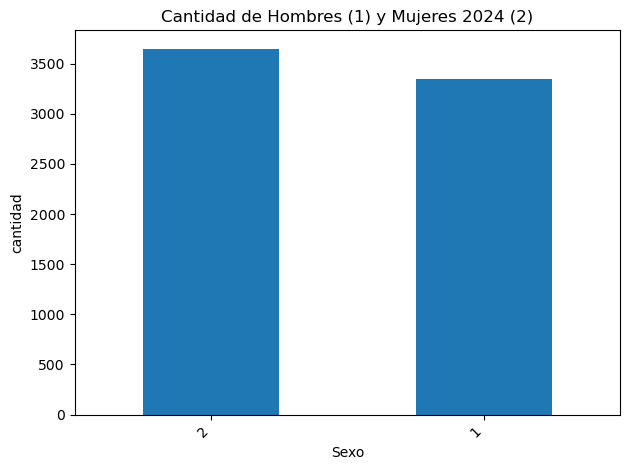

ch04
2    3651
1    3349
Name: count, dtype: int64


In [24]:

dfdatos2024['ch04'].value_counts().plot(kind='bar')

plt.title('Cantidad de Hombres (1) y Mujeres 2024 (2)')
plt.xlabel('Sexo')
plt.ylabel('cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(dfdatos2024['ch04'].value_counts())

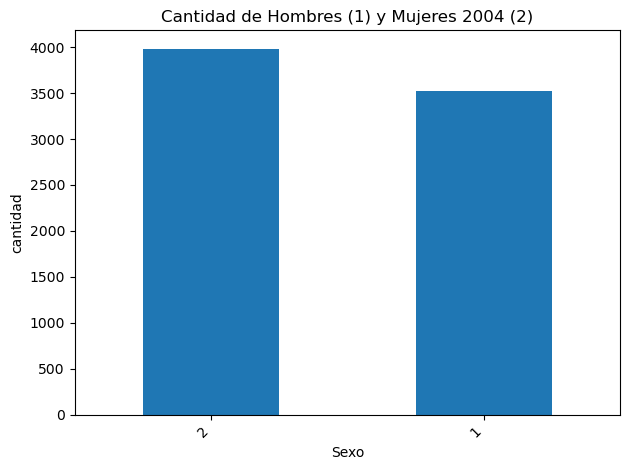

ch04
2    3984
1    3528
Name: count, dtype: int64


In [25]:
dfdatos2004['ch04'].value_counts().plot(kind='bar')

plt.title('Cantidad de Hombres (1) y Mujeres 2004 (2)')
plt.xlabel('Sexo')
plt.ylabel('cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(dfdatos2004['ch04'].value_counts())

2C) Realicen una matriz de correlación para 2004 y 2024 con las
siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED,
ESTADO, CAT_INAC, IPCF. Utilicen alguno de los comandos disponibles en este link o este link para graficar la matriz de
correlación. Comenten los resultados.

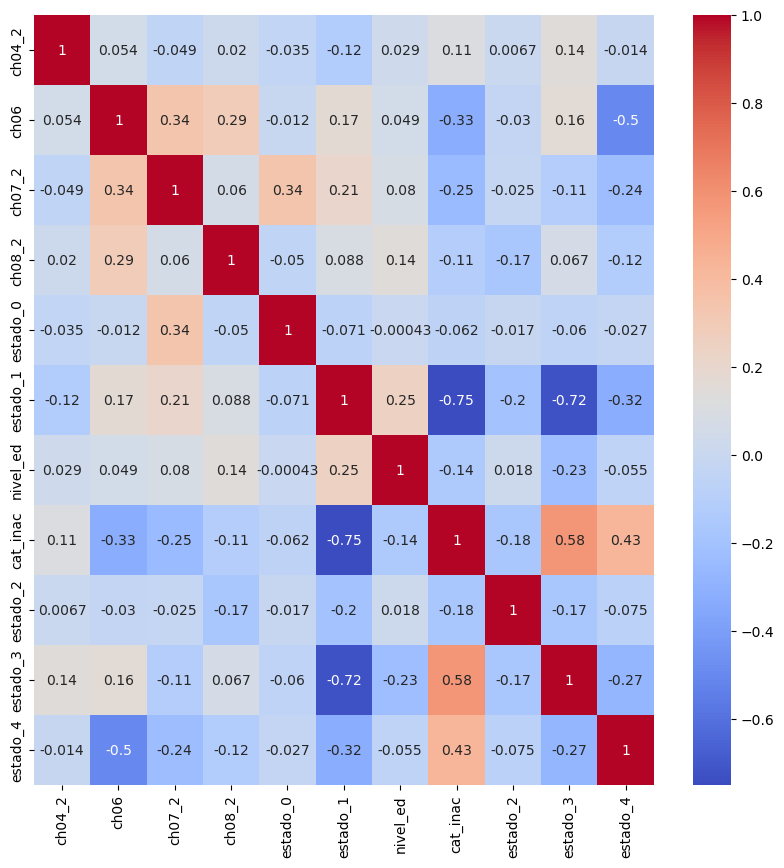

In [26]:
#correlacion de variables en modelo 2024
plt.figure(figsize=(10, 10))
sns.heatmap(df2024corr.corr(),annot=True, cmap='coolwarm')
plt.show()

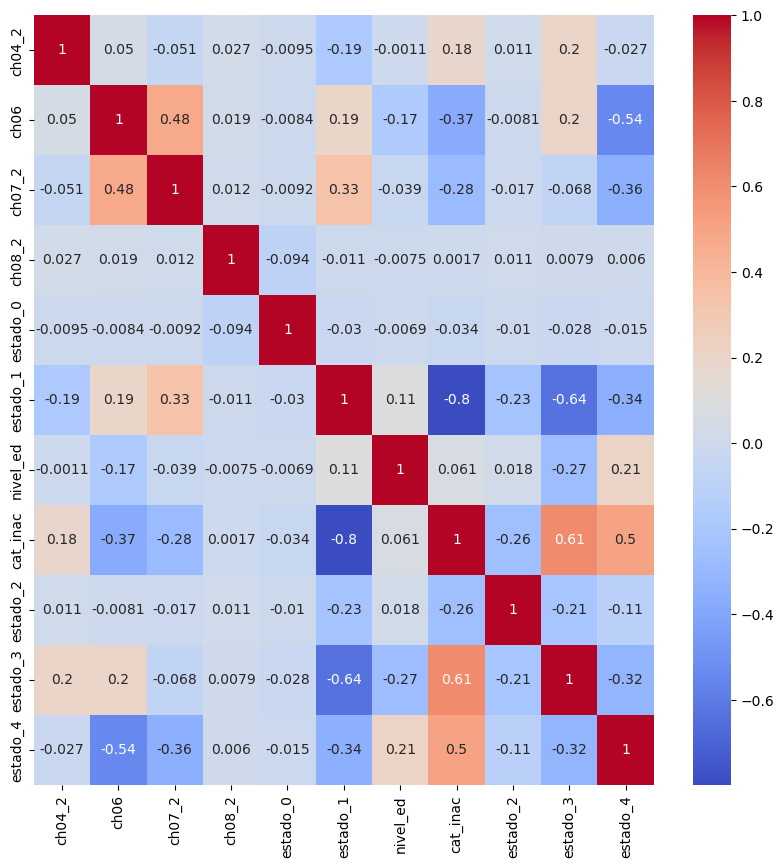

In [27]:
#correlacion de variables en modelo 2004
plt.figure(figsize=(10, 10))
sns.heatmap(df2004corr.corr(),annot=True, cmap='coolwarm')
plt.show()

2 E) ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos?
¿Cuál es la media de ingreso per cápita familiar (IPCF) según
estado (ocupado, desocupado, inactivo)?

In [28]:
#union de las muestras de 2024 y 2004 para las columnas del punto E
df2004_subset = dfdatos2004[['estado', 'ipcf']]
df2024_subset = dfdatos2024[['estado', 'ipcf']]



dfpuntoe = pd.concat([df2004_subset, df2024_subset], ignore_index=True)

In [29]:
print(dfpuntoe['estado'].value_counts())

#¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos?
# hay 839 desocupados (2) y 5459 inactivos (3)

estado
1    6302
3    5459
4    1861
2     839
0      51
Name: count, dtype: int64


In [30]:
#¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)
print(dfpuntoe.groupby('estado')['ipcf'].mean())
#ipcf promedio dependiendo del estado

estado
0      6530.305359
1    253629.587883
2    120976.761529
3    166370.098757
4    135031.623357
Name: ipcf, dtype: float64


Pregunta 3
Uno de los grandes problemas de la EPH es la creciente cantidad de
hogares que no reportan sus ingresos (ver por ejemplo el siguiente
informe). ¿Cuántas personas no respondieron cuál es su condición de
actividad? Guarden como una base distinta llamada respondieron las
observaciones donde respondieron la pregunta sobre su condición de
actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una
base bajo el nombre norespondieron.

In [31]:

print(dfcompleto['estado'].value_counts())

#no respondieron 51 personas

estado
1    6302
3    5459
4    1861
2     839
0      51
Name: count, dtype: int64


In [32]:
#se separa las bases en respondieron (todos los que no tengan valor 0 en la columna estado) y no respondieron (estado == 0)
respondieron=dfcompleto[dfcompleto['estado']!=0]
norespondieron=dfcompleto[dfcompleto['estado']==0]

PREGUNTA 4:
Agreguen a la base respondieron una columna llamada PEA
(Población Económicamente Activa) que tome 1 si están ocupados o
desocupados en ESTADO. Realicen un gráfico de barras mostrando la
composición por PEA para 2004 y 2024. Comenten los resultados.


In [33]:
#se hace un lambda que confirma si estan ocupados o desocupados, dandoles 1 si es el caso
respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)
print(respondieron['PEA'].groupby(respondieron['ano']).value_counts())
#hay

ano   PEA
2004  0      3896
      1      3606
2024  1      3535
      0      3424
Name: count, dtype: int64


C:\Users\Franscisco Giacobell\AppData\Local\Temp\ipykernel_17168\3030155582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)


<Axes: xlabel='ano', ylabel='count'>

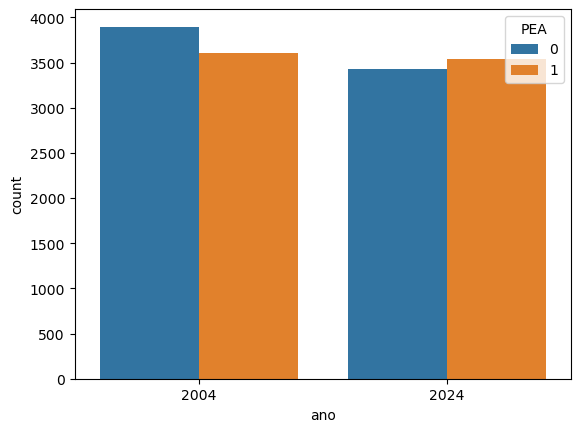

In [34]:
sns.countplot(x='ano', hue='PEA', data=respondieron)
#grafico de barras separando los años

PREGUNTA 5: Agreguen a la base respondieron una columna llamada PET
(Población en Edad para Trabajar) que tome 1 si están la persona tiene
entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrando
la composición por PEA para 2004 y 2024. Comenten los resultados y
compare PET con PEA.

ano   PET
2004  1      4893
      0      2609
2024  1      4675
      0      2284
Name: count, dtype: int64


C:\Users\Franscisco Giacobell\AppData\Local\Temp\ipykernel_17168\1169373290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PET'] = respondieron['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)


<Axes: xlabel='ano', ylabel='count'>

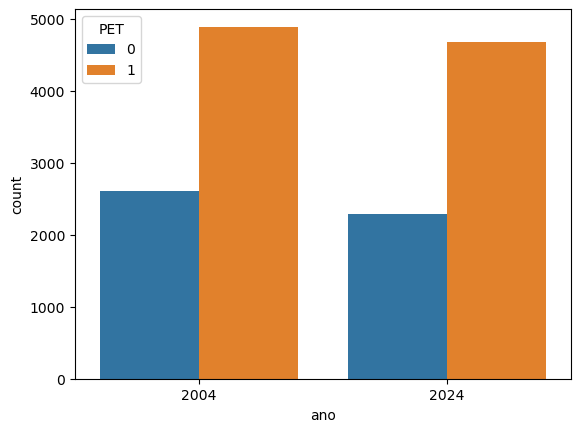

In [35]:
#lo mismo que pregunta 4
respondieron['PET'] = respondieron['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)
print(respondieron['PET'].groupby(respondieron['ano']).value_counts())

sns.countplot(x='ano', hue='PET', data=respondieron)

PREGUNTA 6: Por ultimo, agreguen la base respondieron una columna llamada
desocupado que tome 1 si esta desocupada. ¿Cuántas personas están
desocupadas en 2004 vs 2024?


In [36]:

respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)


C:\Users\Franscisco Giacobell\AppData\Local\Temp\ipykernel_17168\966430915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)


In [37]:
print(respondieron.groupby('ano')['desocupado'].value_counts())

#en 2004 hay 528 personas desocupadas mientras que en 2024 hay solo 311

ano   desocupado
2004  0             6974
      1              528
2024  0             6648
      1              311
Name: count, dtype: int64


#Parte 2


In [38]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

Para cada año, partan la base respondieron en una base de prueba
(test) y una de entrenamiento (train) utilizando el comando
train_test_split. La base de entrenamiento debe comprender el 70%
de los datos, y la semilla a utilizar (random state instance) debe ser 101.
Establezca a desocupado como su variable dependiente en la base de
entrenamiento (vector y). El resto de las variables serán las variables
independientes (matriz X). Recuerden agregar la columna de unos (1)

In [39]:
#columna con unos
respondieron.loc[:, 'unos'] = 1

C:\Users\Franscisco Giacobell\AppData\Local\Temp\ipykernel_17168\943919198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron.loc[:, 'unos'] = 1


In [40]:
#separamos las bases en 2024 y 2004
datos_2024=respondieron[respondieron['ano']==2024]
datos_2004=respondieron[respondieron['ano']==2004]


In [41]:
#se usan las variables de la matriz de correlación, salvo por la variable cat_inac y estado debido a que la primera se trata de una descripcción de que pasa con alguien que esta inactivo y la otra es el origen de la y
x2024=datos_2024[['ch04_2', 'ch06', 'ch07_2', 'ch08_2', 'nivel_ed', 'ipcf','unos']]
y2024=datos_2024['desocupado']
x2004=datos_2004[['ch04_2', 'ch06', 'ch07_2', 'ch08_2', 'nivel_ed','ipcf','unos']]
y2004=datos_2004['desocupado']

In [42]:
xtrain2024, xtest2024, ytrain2024, ytest2024 = train_test_split(x2024, y2024, test_size=0.3, random_state=101)
xtrain2004, xtest2004, ytrain2004, ytest2004 = train_test_split(x2004, y2004, test_size=0.3, random_state=101)


Implementen los siguientes métodos reportando luego la matriz de
confusión, la curva ROC, los valores de AUC y de Accuracy de cada uno:

● Regresión logística

● Análisis discriminante lineal

● KNN con k=3

● Naive Bayes

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Modelo logistico
log2024 = LogisticRegression(penalty=None, max_iter=1000).fit(xtrain2024, ytrain2024)
log2004 = LogisticRegression(penalty=None, max_iter=1000).fit(xtrain2004, ytrain2004)

In [45]:
#LDA
lda2024 = LinearDiscriminantAnalysis()
lda2004= LinearDiscriminantAnalysis()

lda2004=lda2004.fit(xtrain2004, ytrain2004)
lda2024=lda2024.fit(xtrain2024, ytrain2024)

In [46]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn2004 = KNeighborsClassifier(n_neighbors=3)
knn2024 = KNeighborsClassifier(n_neighbors=3)

knn2004=knn2004.fit(xtrain2004, ytrain2004)
knn2024=knn2024.fit(xtrain2024, ytrain2024)

In [47]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

nb2024=GaussianNB()
nb2004=GaussianNB()
nb2024=nb2024.fit(xtrain2024, ytrain2024)
nb2004=nb2024.fit(xtrain2004, ytrain2004)

In [48]:
print()

Evaluación del modelo Naive Bayes 2024:
Accuracy: 0.95
Matriz de Confusión:
[[1988    0]
 [ 100    0]]


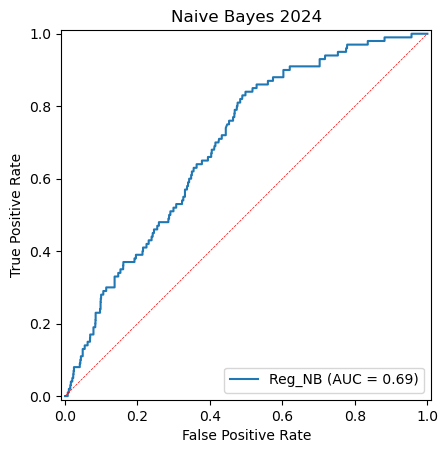

In [49]:

#NB
y_pred_nb2024 = nb2024.predict(xtest2024)
y_prob_nb2024 = nb2024.predict_proba(xtest2024)[:, 1]
accuracy_nb2024 = accuracy_score(ytest2024, y_pred_nb2024)
conf_matrix_nb2024 = confusion_matrix(ytest2024, y_pred_nb2024)
fpr_nb2024, tpr_nb2024, _ = roc_curve(ytest2024, y_prob_nb2024)
roc_auc_nb2024 = roc_auc_score(ytest2024, y_prob_nb2024)

print("Evaluación del modelo Naive Bayes 2024:")
print(f'Accuracy: {accuracy_nb2024:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_nb2024)

# Curva ROC
display = RocCurveDisplay(fpr=fpr_nb2024, tpr=tpr_nb2024, roc_auc=roc_auc_nb2024, estimator_name='Reg_NB')
display.plot()
plt.title('Naive Bayes 2024')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=.5)
plt.show()


Evaluación del modelo Naive Bayes 2004:
Accuracy: 0.93
Matriz de Confusión:
[[2089    0]
 [ 162    0]]


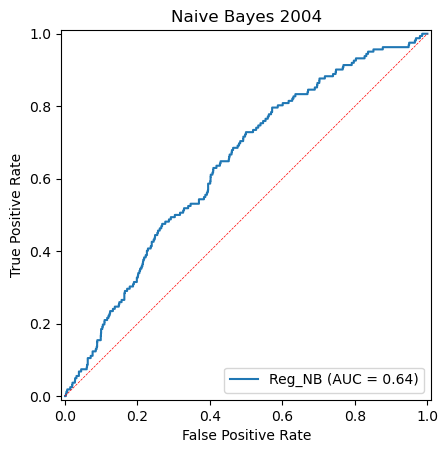

In [50]:
# Predicciones y probabilidades para Naive Bayes 2004
y_pred_nb2004 = nb2004.predict(xtest2004)
y_prob_nb2004 = nb2004.predict_proba(xtest2004)[:, 1]
accuracy_nb2004 = accuracy_score(ytest2004, y_pred_nb2004)
conf_matrix_nb2004 = confusion_matrix(ytest2004, y_pred_nb2004)
fpr_nb2004, tpr_nb2004, _ = roc_curve(ytest2004, y_prob_nb2004)
roc_auc_nb2004 = roc_auc_score(ytest2004, y_prob_nb2004)

print("Evaluación del modelo Naive Bayes 2004:")
print(f'Accuracy: {accuracy_nb2004:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_nb2004)

display = RocCurveDisplay(fpr=fpr_nb2004, tpr=tpr_nb2004, roc_auc=roc_auc_nb2004, estimator_name='Reg_NB')
display.plot()
plt.title('Naive Bayes 2004')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=.5)
plt.show()


Evaluación del modelo KNN 2024:
Accuracy: 0.95
Matriz de Confusión:
[[1973   15]
 [  97    3]]


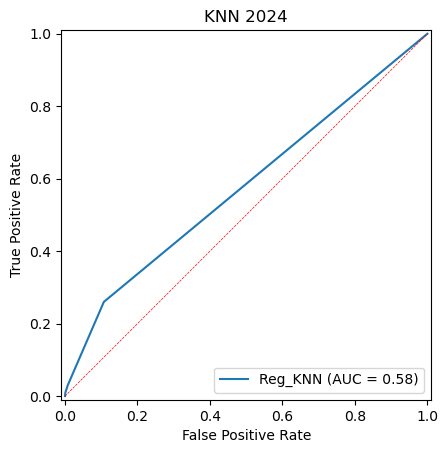

In [51]:
#KNN
y_pred_knn2024 = knn2024.predict(xtest2024)
y_prob_knn2024 = knn2024.predict_proba(xtest2024)[:, 1]

accuracy_knn2024 = accuracy_score(ytest2024, y_pred_knn2024)
conf_matrix_knn2024 = confusion_matrix(ytest2024, y_pred_knn2024)
fpr_knn2024, tpr_knn2024, _ = roc_curve(ytest2024, y_prob_knn2024)
roc_auc_knn2024 = roc_auc_score(ytest2024, y_prob_knn2024)

print("Evaluación del modelo KNN 2024:")
print(f'Accuracy: {accuracy_knn2024:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_knn2024)

display = RocCurveDisplay(fpr=fpr_knn2024, tpr=tpr_knn2024, roc_auc=roc_auc_knn2024, estimator_name='Reg_KNN')
display.plot()
plt.title('KNN 2024')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=.5)
plt.show()


Evaluación del modelo KNN 2004:
Accuracy: 0.91
Matriz de Confusión:
[[2038   51]
 [ 156    6]]


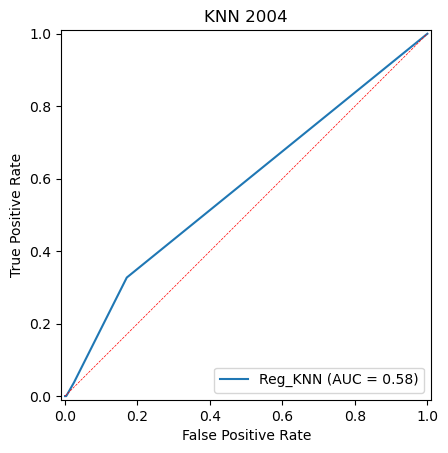

In [52]:

y_pred_knn2004 = knn2004.predict(xtest2004)
y_prob_knn2004 = knn2004.predict_proba(xtest2004)[:, 1]
accuracy_knn2004 = accuracy_score(ytest2004, y_pred_knn2004)
conf_matrix_knn2004 = confusion_matrix(ytest2004, y_pred_knn2004)
fpr_knn2004, tpr_knn2004, _ = roc_curve(ytest2004, y_prob_knn2004)
roc_auc_knn2004 = roc_auc_score(ytest2004, y_prob_knn2004)


print("Evaluación del modelo KNN 2004:")
print(f'Accuracy: {accuracy_knn2004:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_knn2004)


display = RocCurveDisplay(fpr=fpr_knn2004, tpr=tpr_knn2004, roc_auc=roc_auc_knn2004, estimator_name='Reg_KNN')
display.plot()
plt.title('KNN 2004')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=.5)
plt.show()

Evaluación del modelo LDA 2024:
Accuracy: 0.95
Matriz de Confusión:
[[1988    0]
 [ 100    0]]


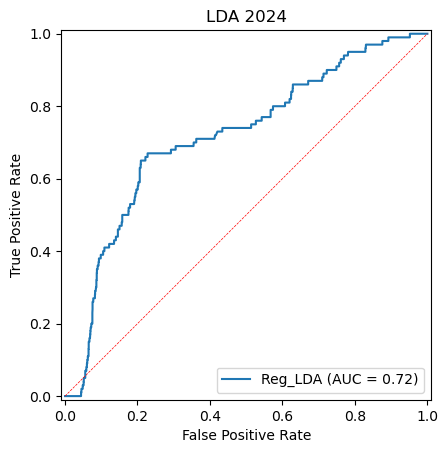

In [53]:
#LDA
y_pred_lda2024 = lda2024.predict(xtest2024)
y_prob_lda2024 = lda2024.predict_proba(xtest2024)[:, 1]
accuracy_lda2024 = accuracy_score(ytest2024, y_pred_lda2024)
conf_matrix_lda2024 = confusion_matrix(ytest2024, y_pred_lda2024)
fpr_lda2024, tpr_lda2024, _ = roc_curve(ytest2024, y_prob_lda2024)
roc_auc_lda2024 = roc_auc_score(ytest2024, y_prob_lda2024)


print("Evaluación del modelo LDA 2024:")
print(f'Accuracy: {accuracy_lda2024:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_lda2024)


display = RocCurveDisplay(fpr=fpr_lda2024, tpr=tpr_lda2024, roc_auc=roc_auc_lda2024, estimator_name='Reg_LDA')
display.plot()
plt.title('LDA 2024')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=.5)
plt.show()

Evaluación del modelo LDA 2004:
Accuracy: 0.93
Matriz de Confusión:
[[2089    0]
 [ 162    0]]


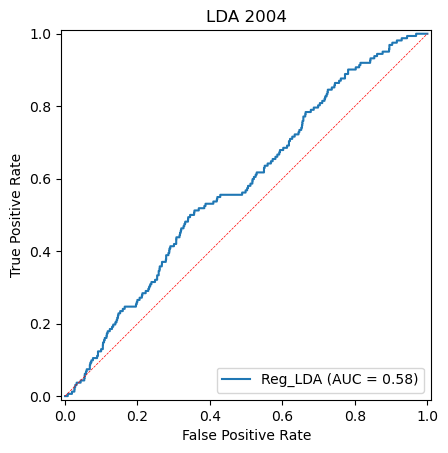

In [54]:
# Evaluación del modelo LDA 2004
y_pred_lda2004 = lda2004.predict(xtest2004)
y_pred_prob2004 = lda2004.predict_proba(xtest2004)[:, 1]
accuracy_lda2004 = accuracy_score(ytest2004, y_pred_lda2004)
conf_matrix_lda2004 = confusion_matrix(ytest2004, y_pred_lda2004)
fpr_lda2004, tpr_lda2004, _ = roc_curve(ytest2004, y_pred_prob2004)
roc_auc_lda2004 = roc_auc_score(ytest2004, y_pred_prob2004)

print("Evaluación del modelo LDA 2004:")
print(f'Accuracy: {accuracy_lda2004:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_lda2004)

display = RocCurveDisplay(fpr=fpr_lda2004, tpr=tpr_lda2004, roc_auc=roc_auc_lda2004, estimator_name='Reg_LDA')
display.plot()
plt.title('LDA 2004')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=.5)
plt.show()

Evaluación del modelo Logístico 2024:
Accuracy: 0.95
Matriz de Confusión:
[[1988    0]
 [ 100    0]]


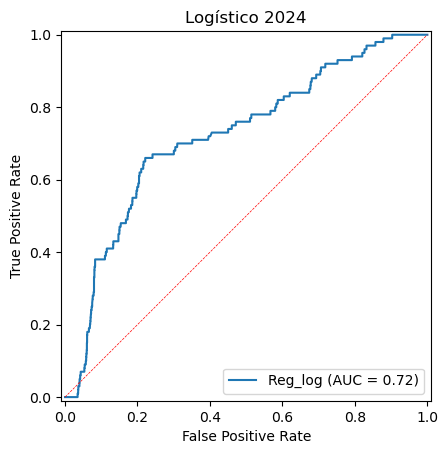

In [55]:
# Evaluación del modelo Logístico 2024
y_pred_log2024 = log2024.predict(xtest2024)
y_pred_prob2024 = log2024.predict_proba(xtest2024)[:, 1]
accuracy_log2024 = accuracy_score(ytest2024, y_pred_log2024)
conf_matrix_log2024 = confusion_matrix(ytest2024, y_pred_log2024)
fpr_log2024, tpr_log2024, _ = roc_curve(ytest2024, y_pred_prob2024)
roc_auc_log2024 = roc_auc_score(ytest2024, y_pred_prob2024)

print("Evaluación del modelo Logístico 2024:")
print(f'Accuracy: {accuracy_log2024:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_log2024)

display = RocCurveDisplay(fpr=fpr_log2024, tpr=tpr_log2024, roc_auc=roc_auc_log2024, estimator_name='Reg_log')
display.plot()
plt.title('Logístico 2024')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=.5)
plt.show()

Evaluación del modelo Logístico 2004:
Accuracy: 0.93
Matriz de Confusión:
[[2089    0]
 [ 162    0]]


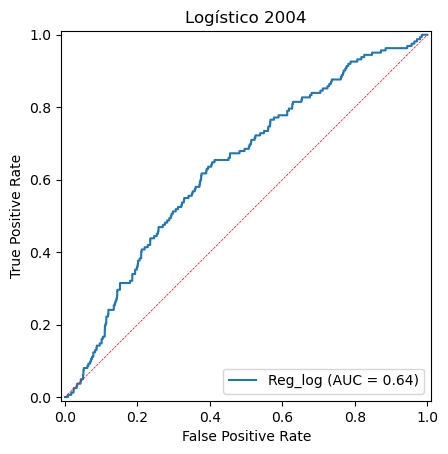

In [56]:
y_pred_log2004 = log2004.predict(xtest2004)
y_pred_prob2004=log2004.predict_proba(xtest2004)[:, 1]
accuracy_log2004 = accuracy_score(ytest2004, y_pred_log2004)
conf_matrix_log2004 = confusion_matrix(ytest2004, y_pred_log2004)
fpr_log2004, tpr_log2004, _ = roc_curve(ytest2004, y_pred_prob2004)
roc_auc_log2004 = roc_auc_score(ytest2004, y_pred_prob2004)

print("Evaluación del modelo Logístico 2004:")
print(f'Accuracy: {accuracy_log2004:.2f}')
print('Matriz de Confusión:')
print(conf_matrix_log2004)

display = RocCurveDisplay(fpr=fpr_log2004, tpr=tpr_log2004, roc_auc=roc_auc_log2004, estimator_name='Reg_log')
display.plot()
plt.title('Logístico 2004')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', linewidth=.5)
plt.show()

# 3. Compare los resultados de 2004 versus 2024. ¿Cuál de los métodos predice mejor en cada año? Justifiquen detalladamente utilizando las medidas de precisión que conocen.


In [57]:
# Datos para 2004
data2004 = {
    'Modelo': ['Regresión Logística', 'LDA', 'KNN', 'Naive Bayes'],
    'Precisión': [accuracy_log2004, accuracy_lda2004, accuracy_knn2004, accuracy_nb2004],
    'AUC': [roc_auc_log2004, roc_auc_lda2004, roc_auc_knn2004, roc_auc_nb2004]
}

# Datos para 2024
data2024 = {
    'Modelo': ['Regresión Logística', 'LDA', 'KNN', 'Naive Bayes'],
    'Precisión': [accuracy_log2024, accuracy_lda2024, accuracy_knn2024, accuracy_nb2024],
    'AUC': [roc_auc_log2024, roc_auc_lda2024, roc_auc_knn2024, roc_auc_nb2024]
}

df2004 = pd.DataFrame(data2004)
df2024 = pd.DataFrame(data2024)

#Hago las tablas
print("2004:")
print(df2004)

print("2024:")
print(df2024)

2004:
                Modelo  Precisión       AUC
0  Regresión Logística   0.928032  0.637645
1                  LDA   0.928032  0.579811
2                  KNN   0.908041  0.577472
3          Naive Bayes   0.928032  0.637367
2024:
                Modelo  Precisión       AUC
0  Regresión Logística   0.952107  0.722387
1                  LDA   0.952107  0.716577
2                  KNN   0.946360  0.577077
3          Naive Bayes   0.952107  0.694384


# 4. Con el método que seleccionaron, predigan qué personas son desocupadas dentro de la base norespondieron. ¿Qué proporción de las personas que no respondieron pudieron identificar como desocupadas?

In [58]:
# Asumiendo que tienes los dataframes con los resultados de los modelos
print("2004:")
print(df2004)
print("2024:")
print(df2024)

2004:
                Modelo  Precisión       AUC
0  Regresión Logística   0.928032  0.637645
1                  LDA   0.928032  0.579811
2                  KNN   0.908041  0.577472
3          Naive Bayes   0.928032  0.637367
2024:
                Modelo  Precisión       AUC
0  Regresión Logística   0.952107  0.722387
1                  LDA   0.952107  0.716577
2                  KNN   0.946360  0.577077
3          Naive Bayes   0.952107  0.694384


In [59]:
#se selecciona el modelo logistico de 2024
modelo = log2024


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#debido a que sino los resultados dan 0, se escala las variables para el modelo
scaler = StandardScaler()

#columna de 1s
norespondieron.loc[:, 'unos'] = 1

#variables de no respondieron
X_norespondieron = norespondieron[['ch04_2', 'ch06', 'ch07_2', 'ch08_2', 'nivel_ed', 'ipcf','unos']]

#debido a la poca cantidad de datos de no respondieron (51), el modelo era incapaz de dar probabilidad de desocupado
X_norespondieron_scaled = scaler.fit_transform(X_norespondieron)


norespondieron.loc[:, 'predicted_desocupado'] = modelo.predict(X_norespondieron_scaled)

# Calcular la proporción
unemployed_count = norespondieron[norespondieron['predicted_desocupado'] == 1].shape[0]
total_count = norespondieron.shape[0]
proportion_unemployed = unemployed_count / total_count

print(f"Proporción de desempleados en 'norespondieron': {proportion_unemployed}")
print(norespondieron['predicted_desocupado'].value_counts())

Proporción de desempleados en 'norespondieron': 0.19607843137254902
predicted_desocupado
0    41
1    10
Name: count, dtype: int64


C:\Users\Franscisco Giacobell\AppData\Local\Temp\ipykernel_17168\4056182221.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norespondieron.loc[:, 'unos'] = 1
c:\Users\Franscisco Giacobell\anaconda3\envs\CienciaDatos\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Franscisco Giacobell\AppData\Local\Temp\ipykernel_17168\4056182221.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nor

In [60]:
unemployed_count = norespondieron[norespondieron['predicted_desocupado'] == 1].shape[0]
total_count = norespondieron.shape[0]
proportion_unemployed = unemployed_count / total_count

print(f"Proporción de desempleados en 'norespondieron': {proportion_unemployed}")

Proporción de desempleados en 'norespondieron': 0.19607843137254902
